In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
liver = pd.read_csv('liver.csv')
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver['gender']=liver['gender'].map({'Male':1,'male':0})
liver['is_patient']=liver['is_patient'].map({1:1,2:0})
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver.groupby('is_patient').size()

is_patient
0    167
1    416
dtype: int64

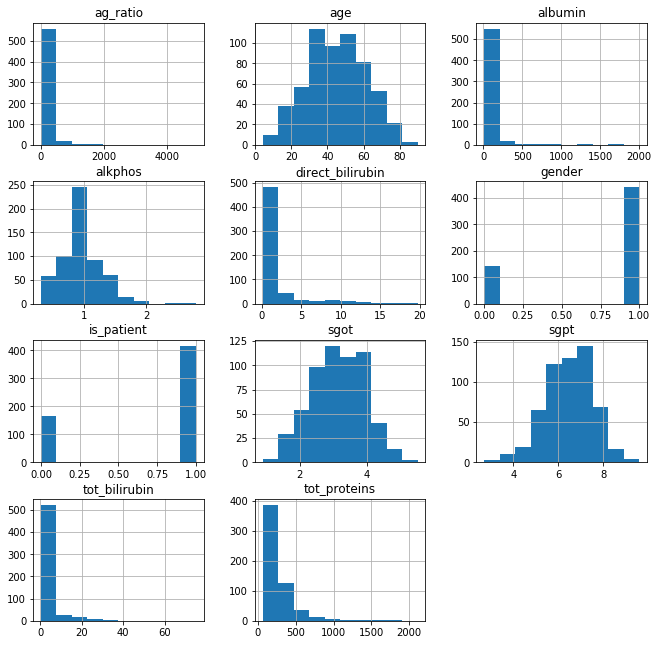

In [5]:
x=liver.hist(figsize=(11, 11))

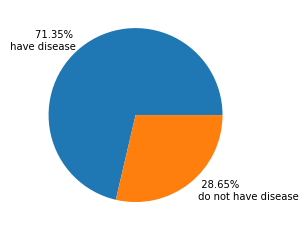

In [6]:
labels = ['71.35% \n have disease','  28.65% \n do not have disease']
values = [416,167]

plt.pie(values,labels=labels,radius=1)
plt.show()

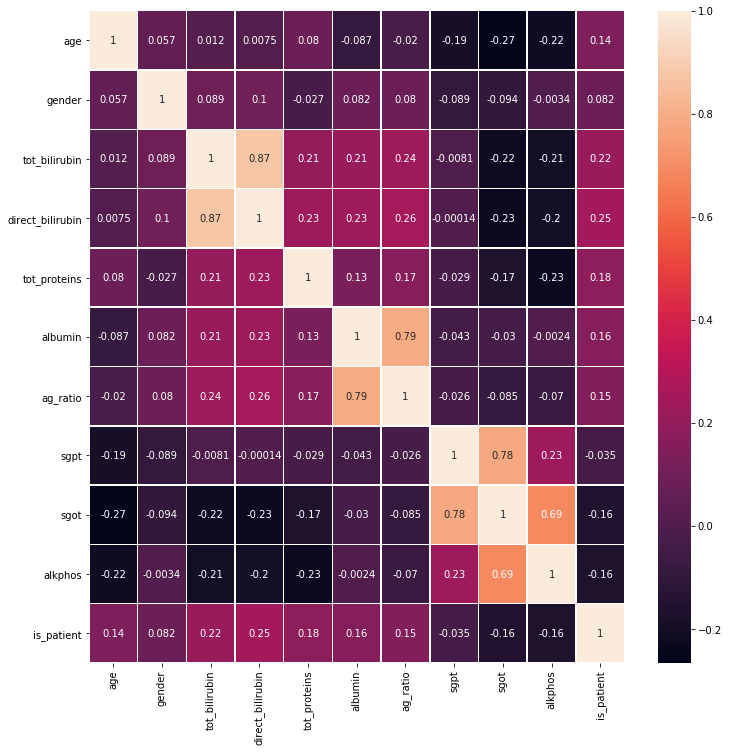

In [7]:
corr_matrix=liver.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)

In [8]:
for value in liver.iloc[:,0:10]:
    print (value,":", sum(liver[value] == 0))

age : 0
gender : 142
tot_bilirubin : 0
direct_bilirubin : 0
tot_proteins : 0
albumin : 0
ag_ratio : 0
sgpt : 0
sgot : 0
alkphos : 0


In [9]:
liver.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [10]:
liver.isna().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

## Data cleaning

In [11]:
data=liver.copy()
data=data.dropna(how='any',axis=0)

## 3- Feature engineering


In [12]:
feature_names=['age','gender','tot_bilirubin','indirect_bilirubin','total_proteins','albumin','ag_ratio','sgpt','sgot','alkphos']
X = data[feature_names]
y = data.is_patient

## 4 - Model Selection

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report



##  a)Train/Test split

In [14]:
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()
#sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
#models.append(('ADB', AdaBoostClassifier(n_estimators=100,learning_rate=1)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))


In [19]:
names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
#tr_split.to_csv('withoutliers.csv')

  Name     Score
0  KNN  0.603448
1  SVC  0.689655
2   LR  0.724138
3   DT  0.706897
4  GNB  0.543103
5   RF  0.681034
6   GB  0.715517
7  XGB  0.689655


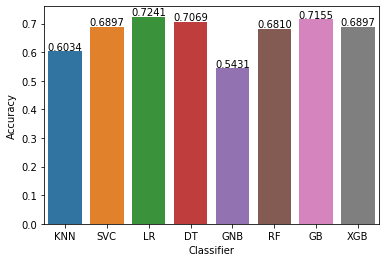

<Figure size 432x288 with 0 Axes>

In [20]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()
plt.savefig('xx1.png')

## PCA with Feature Scaling through standazation(Z score normalization)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [22]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('SVC', SVC(gamma=.2)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',max_depth=4)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=0)))
models.append(('XGB',  XGBClassifier(learning_rate=0.1,subsample = 0.8,objective='binary:logistic',n_estimators=100,max_depth=4,gamma=10)))

names = []
scores = []

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)
tr_split.to_csv('PCAreasult.csv')

  Name     Score
0  KNN  0.663793
1  SVC  0.706897
2   LR  0.724138
3   DT  0.672414
4  GNB  0.508621
5   RRF  0.681034
6   GB  0.706897
7  XGB  0.706897


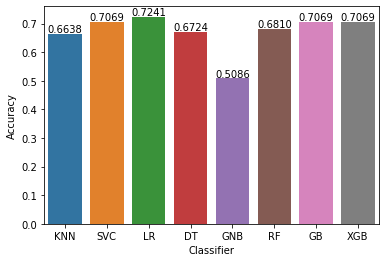

In [23]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Confusion matrix

KNN


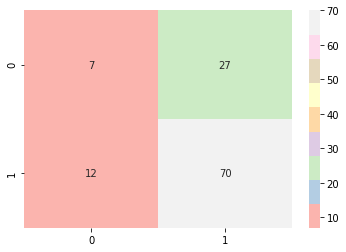

SVC


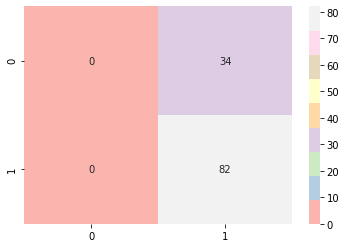

LR


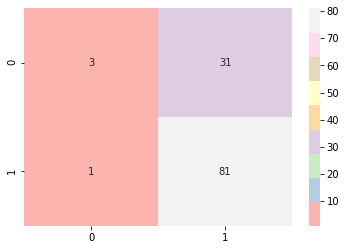

DT


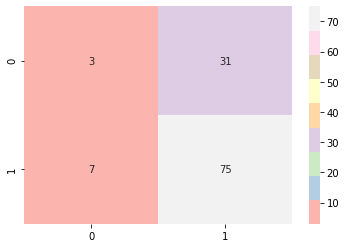

GNB


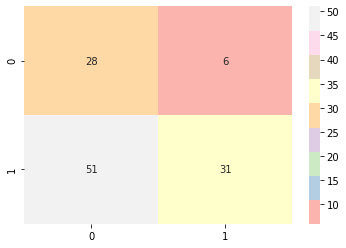

RF


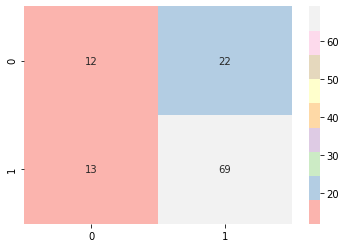

GB


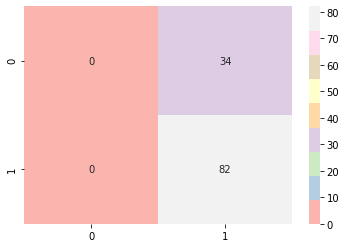

XGB


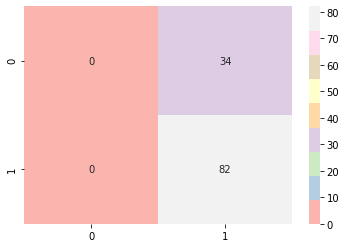

In [24]:
import seaborn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    seaborn.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Pastel1')
    print(name)
    plt.show()


In [25]:
from sklearn import metrics
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(model.predict(X_train),y_train,drop_intermediate=False)
names = []
AUC_score = []
precision=[]
Recall=[]
Accuracy=[]
F1_score=[]
Matthews_corrcoef=[]
specificity=[]
for name,model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    Accuracy.append(accuracy_score(y_test, y_pred))
    Recall.append(metrics.recall_score(y_test, y_pred))
    precision.append(metrics.precision_score(y_test, y_pred))
    AUC_score.append(roc_auc_score(y_test, y_pred))
    F1_score.append(f1_score(y_test,y_pred))
    Matthews_corrcoef.append(matthews_corrcoef(y_test,y_pred))
    specificity.append(TN / (TN + FP))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'precision': precision,'Sensitivity':Recall,'F1 score':F1_score,'AUC score':AUC_score,'Accuracy':Accuracy,'Matthews corrcoef':Matthews_corrcoef,'specificity':specificity})
print(tr_split)
tr_split.to_csv('liverresult.csv')


C:\Users\Amlan\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Amlan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


  Name  precision  Sensitivity  F1 score  AUC score  Accuracy  \
0  KNN   0.721649     0.853659  0.782123   0.529770  0.663793   
1  SVC   0.706897     1.000000  0.828283   0.500000  0.706897   
2   LR   0.723214     0.987805  0.835052   0.538020  0.724138   
3   DT   0.707547     0.914634  0.797872   0.501435  0.672414   
4  GNB   0.837838     0.378049  0.521008   0.600789  0.508621   
5   RF   0.734694     0.878049  0.800000   0.556671  0.689655   
6   GB   0.706897     1.000000  0.828283   0.500000  0.706897   
7  XGB   0.706897     1.000000  0.828283   0.500000  0.706897   

   Matthews corrcoef  specificity  
0           0.073232     0.205882  
1           0.000000     0.000000  
2           0.189693     0.088235  
3           0.004654     0.088235  
4           0.196868     0.823529  
5           0.142492     0.235294  
6           0.000000     0.000000  
7           0.000000     0.000000  


C:\Users\Amlan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Amlan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


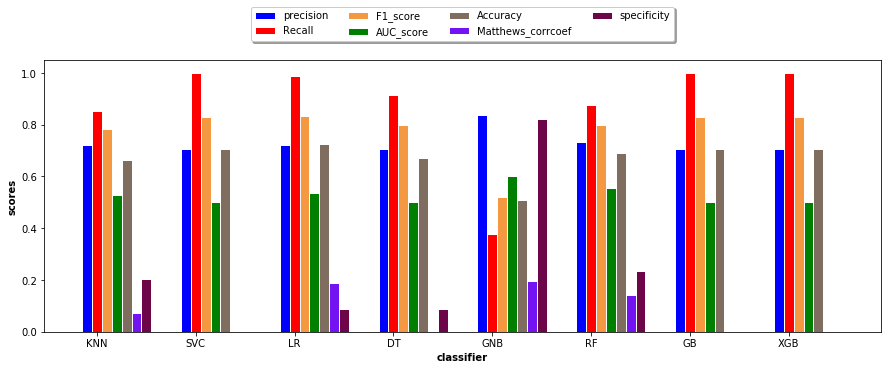

In [26]:
barWidth = 0.1

r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 
# Make the plot
plt.subplots(figsize=(15,5))
plt.bar(r1, precision, color='blue', width=barWidth, edgecolor='white', label='precision')
plt.bar(r2, Recall, color='red', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r3, F1_score, color='#f49842', width=barWidth, edgecolor='white', label='F1_score')
plt.bar(r4, AUC_score, color='green', width=barWidth, edgecolor='white', label='AUC_score')
plt.bar(r5, Accuracy, color='#7f6d5f', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r6, Matthews_corrcoef, color='#7313f2', width=barWidth, edgecolor='white', label='Matthews_corrcoef')
plt.bar(r7, specificity, color='#6d0649', width=barWidth, edgecolor='white', label='specificity')
# Add xticks on the middle of the group bars
plt.xlabel('classifier', fontweight='bold')
plt.ylabel('scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], ['KNN', 'SVC', 'LR', 'DT', 'GNB','RF','GB','XGB'])
 
# Create legend & Show graphic
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.05),ncol=4,fancybox=True,shadow=True)
plt.show()

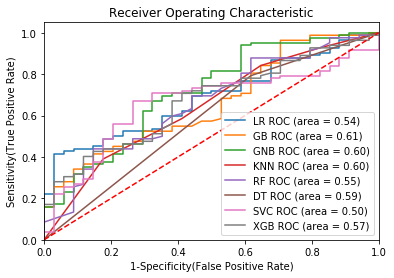

In [27]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn import metrics
#import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'LR',
    'model': LogisticRegression(),
},
{
    'label': 'GB',
    'model': GradientBoostingClassifier(),
},    
{
    'label': 'GNB',
    'model': GaussianNB(),
}, 
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'RF',
    'model': RandomForestClassifier(),
},
{
    'label': 'DT',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'SVC',
    'model': SVC(probability=True),
},
{
    'label': 'XGB',
    'model':  XGBClassifier(),
},
]


# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## RFECV(Using K-Fold cross validation)

In [28]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=1)
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=model, step=1, cv=kfold, scoring='accuracy')
rfecv.fit(X_train, y_train)

C:\Users\Amlan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFECV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='binary:logistic',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [29]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['age', 'gender']


In [32]:
# Calculate accuracy scores 
X_new = data[new_features]
initial_score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(model, X_new, y, cv=kfold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.6720205686630368 
Accuracy after Feature Selection : 0.6719600725952812 


## Deep learning


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
# fix random seed for reproducibility
np.random.seed(7)
# create model
model = Sequential()
model.add(Dense(16, input_dim=10, init='uniform',activation='relu'))
model.add(Dense(64, init='uniform', activation='relu')) # 100 neurons with tanh activation function
model.add(Dense(12, init='uniform',activation='relu'))
model.add(Dense(16, init='uniform',activation='relu'))
model.add(Dense(1, init='uniform',activation='sigmoid'))
# Compile model

#sgd = optimizers.SGD(lr=0.01, nesterov=True)
#adam=optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer=sgd)
# Fit the model

x=model.fit(X_train, y_train, epochs=300, batch_size=10,validation_data=(X_test, y_test))
#y_pred = model.predict(X_test)
# evaluate the model
score = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=10, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
C:\Users\Amlan\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel

Train on 434 samples, validate on 145 samples
Epoch 1/300
434/434 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.7028 - val_loss: 0.5398 - val_accuracy: 0.7172
Epoch 2/300
434/434 [==============================] - 0s 267us/step - loss: 0.5446 - accuracy: 0.7143 - val_loss: 0.5360 - val_accuracy: 0.7172
Epoch 3/300
434/434 [==============================] - 0s 254us/step - loss: 0.5392 - accuracy: 0.7143 - val_loss: 0.5349 - val_accuracy: 0.7172
Epoch 4/300
434/434 [==============================] - 0s 357us/step - loss: 0.5317 - accuracy: 0.7143 - val_loss: 0.5355 - val_accuracy: 0.7172
Epoch 5/300
434/434 [==============================] - 0s 286us/step - loss: 0.5340 - accuracy: 0.7143 - val_loss: 0.5410 - val_accuracy: 0.7172
Epoch 6/300
434/434 [==============================] - 0s 286us/step - loss: 0.5268 - accuracy: 0.7143 - val_loss: 0.5367 - val_accuracy: 0.7172
Epoch 7/300
434/434 [==============================] - 0s 329us/step - loss: 0.5268 - 

Epoch 57/300
434/434 [==============================] - 0s 412us/step - loss: 0.5008 - accuracy: 0.7327 - val_loss: 0.5192 - val_accuracy: 0.6552
Epoch 58/300
434/434 [==============================] - 0s 405us/step - loss: 0.4978 - accuracy: 0.7350 - val_loss: 0.5113 - val_accuracy: 0.6966
Epoch 59/300
434/434 [==============================] - 0s 381us/step - loss: 0.4972 - accuracy: 0.7350 - val_loss: 0.5138 - val_accuracy: 0.6690
Epoch 60/300
434/434 [==============================] - 0s 245us/step - loss: 0.5021 - accuracy: 0.7419 - val_loss: 0.5170 - val_accuracy: 0.6552
Epoch 61/300
434/434 [==============================] - 0s 189us/step - loss: 0.4947 - accuracy: 0.7327 - val_loss: 0.5162 - val_accuracy: 0.7034
Epoch 62/300
434/434 [==============================] - 0s 218us/step - loss: 0.5022 - accuracy: 0.7327 - val_loss: 0.5131 - val_accuracy: 0.6966
Epoch 63/300
434/434 [==============================] - 0s 283us/step - loss: 0.4935 - accuracy: 0.7373 - val_loss: 0.5183 -

434/434 [==============================] - 0s 324us/step - loss: 0.4844 - accuracy: 0.7442 - val_loss: 0.5319 - val_accuracy: 0.6759
Epoch 114/300
434/434 [==============================] - 0s 350us/step - loss: 0.4776 - accuracy: 0.7488 - val_loss: 0.5416 - val_accuracy: 0.7103
Epoch 115/300
434/434 [==============================] - 0s 305us/step - loss: 0.4769 - accuracy: 0.7488 - val_loss: 0.5519 - val_accuracy: 0.7034
Epoch 116/300
434/434 [==============================] - 0s 294us/step - loss: 0.4859 - accuracy: 0.7396 - val_loss: 0.5474 - val_accuracy: 0.6897
Epoch 117/300
434/434 [==============================] - 0s 288us/step - loss: 0.4804 - accuracy: 0.7535 - val_loss: 0.5623 - val_accuracy: 0.7034
Epoch 118/300
434/434 [==============================] - 0s 266us/step - loss: 0.4760 - accuracy: 0.7558 - val_loss: 0.5608 - val_accuracy: 0.6690
Epoch 119/300
434/434 [==============================] - 0s 279us/step - loss: 0.4802 - accuracy: 0.7281 - val_loss: 0.5314 - val_ac

Epoch 169/300
434/434 [==============================] - 0s 199us/step - loss: 0.4471 - accuracy: 0.7558 - val_loss: 0.7147 - val_accuracy: 0.6483
Epoch 170/300
434/434 [==============================] - 0s 220us/step - loss: 0.4462 - accuracy: 0.7558 - val_loss: 0.6968 - val_accuracy: 0.6828
Epoch 171/300
434/434 [==============================] - 0s 285us/step - loss: 0.4405 - accuracy: 0.7373 - val_loss: 0.7293 - val_accuracy: 0.7034
Epoch 172/300
434/434 [==============================] - 0s 210us/step - loss: 0.4482 - accuracy: 0.7442 - val_loss: 0.7182 - val_accuracy: 0.6552
Epoch 173/300
434/434 [==============================] - 0s 193us/step - loss: 0.4411 - accuracy: 0.7465 - val_loss: 0.7195 - val_accuracy: 0.6828
Epoch 174/300
434/434 [==============================] - 0s 234us/step - loss: 0.4414 - accuracy: 0.7512 - val_loss: 0.7153 - val_accuracy: 0.6207
Epoch 175/300
434/434 [==============================] - 0s 193us/step - loss: 0.4405 - accuracy: 0.7512 - val_loss: 0

Epoch 225/300
434/434 [==============================] - 0s 241us/step - loss: 0.4289 - accuracy: 0.7696 - val_loss: 0.9075 - val_accuracy: 0.6621
Epoch 226/300
434/434 [==============================] - 0s 326us/step - loss: 0.4333 - accuracy: 0.7396 - val_loss: 0.7536 - val_accuracy: 0.6897
Epoch 227/300
434/434 [==============================] - 0s 301us/step - loss: 0.4289 - accuracy: 0.7558 - val_loss: 0.8234 - val_accuracy: 0.6552
Epoch 228/300
434/434 [==============================] - 0s 310us/step - loss: 0.4264 - accuracy: 0.7627 - val_loss: 0.8237 - val_accuracy: 0.7103
Epoch 229/300
434/434 [==============================] - 0s 257us/step - loss: 0.4224 - accuracy: 0.7512 - val_loss: 0.9681 - val_accuracy: 0.6690
Epoch 230/300
434/434 [==============================] - 0s 228us/step - loss: 0.4458 - accuracy: 0.7396 - val_loss: 0.6372 - val_accuracy: 0.6966
Epoch 231/300
434/434 [==============================] - 0s 213us/step - loss: 0.4343 - accuracy: 0.7535 - val_loss: 0

Epoch 281/300
434/434 [==============================] - 0s 299us/step - loss: 0.4064 - accuracy: 0.7788 - val_loss: 0.9683 - val_accuracy: 0.6552
Epoch 282/300
434/434 [==============================] - 0s 227us/step - loss: 0.4076 - accuracy: 0.7788 - val_loss: 0.9513 - val_accuracy: 0.6414
Epoch 283/300
434/434 [==============================] - 0s 231us/step - loss: 0.4081 - accuracy: 0.7788 - val_loss: 0.9038 - val_accuracy: 0.6621
Epoch 284/300
434/434 [==============================] - 0s 209us/step - loss: 0.4128 - accuracy: 0.7696 - val_loss: 0.9623 - val_accuracy: 0.6345
Epoch 285/300
434/434 [==============================] - 0s 229us/step - loss: 0.4152 - accuracy: 0.7742 - val_loss: 0.8775 - val_accuracy: 0.6345
Epoch 286/300
434/434 [==============================] - 0s 223us/step - loss: 0.4241 - accuracy: 0.7627 - val_loss: 1.0116 - val_accuracy: 0.6414
Epoch 287/300
434/434 [==============================] - 0s 188us/step - loss: 0.4153 - accuracy: 0.7742 - val_loss: 0

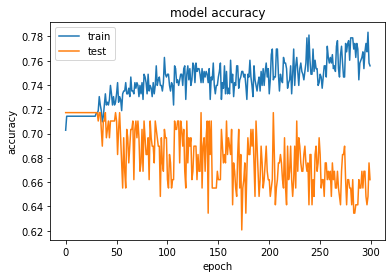

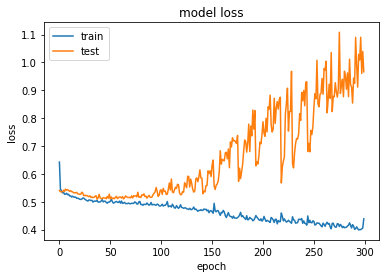

In [35]:
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()